In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from itertools import product
%matplotlib inline

from games import x2048
from agents import DQNagent


Using TensorFlow backend.


In [2]:
episodes = 10000
eval_interval = 100
n_eval_games = 250
dim = 4

parset = [0.013789482254543675,
    32,
    1.1827441119418947,
    0.010043847676676102,
    0.7447212942406423,
    0.8348185066787255,
    2000]

t_scorearr = []
m_scorearr = []
maxtile_arr = []
err_scorearr = []
x_arr_eval = []

game = x2048(dim)
agent = DQNagent(game, parset)

for i in range(episodes):
    print("Training episode %i/%i" % (i, episodes), end='\r')
    t_scorearr.append(agent.train()[0][0])
    if not i % eval_interval:
        m_score, err_score, maxtile = agent.eval(n_eval_games, pts=True)[0:3]
        maxtile_arr.append(maxtile)
        m_scorearr.append(m_score)
        err_scorearr.append(err_score)
        x_arr_eval.append(i)
        print('%i episodes done. Max tile : %i Score: %.5f +- %.2f' % (i, maxtile, m_score, err_score))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Evaluation done after 11.473808 s (0.045895 per game).                     
0 episodes done. Max tile : 256 Score: 1156.24000 +- 522.81
Evaluation done after 38.640970 s (0.154564 per game).                     
100 episodes done. Max tile : 512 Score: 2542.84800 +- 1294.72
Evaluation done after 39.454405 s (0.157818 per game).                     
200 episodes done. Max tile : 512 Score: 2533.23200 +- 1006.39
Evaluation done after 38.927281 s (0.155709 per game).                     
300 episodes done. Max tile : 512 Score: 2536.25600 +- 1055.57
Evaluation done after 39.004267 s (0.156017 per game).                     
400 episodes done. Max tile : 512 Score: 2595.90400 +- 1050.70
Evaluation done after 39.596685 s (0.158387 per game).                     
500 episodes done. Max tile : 512 Score: 2537.69600 +- 1084.31
Evaluation done after 38.928549 s (0.155714 per g

Evaluation done after 37.074975 s (0.148300 per game).                     
5500 episodes done. Max tile : 512 Score: 2549.24800 +- 1054.29
Evaluation done after 37.232575 s (0.148930 per game).                     
5600 episodes done. Max tile : 512 Score: 2503.23200 +- 1044.48
Evaluation done after 38.989074 s (0.155956 per game).                     
5700 episodes done. Max tile : 512 Score: 2590.00000 +- 1157.04
Evaluation done after 32.841900 s (0.131368 per game).                     
5800 episodes done. Max tile : 512 Score: 2114.51200 +- 1083.91
Evaluation done after 38.858848 s (0.155435 per game).                     
5900 episodes done. Max tile : 512 Score: 2668.36800 +- 1108.64
Evaluation done after 38.787036 s (0.155148 per game).                     
6000 episodes done. Max tile : 512 Score: 2564.38400 +- 1029.22
Evaluation done after 39.667182 s (0.158669 per game).                     
6100 episodes done. Max tile : 512 Score: 2649.58400 +- 1085.42
Evaluation done afte

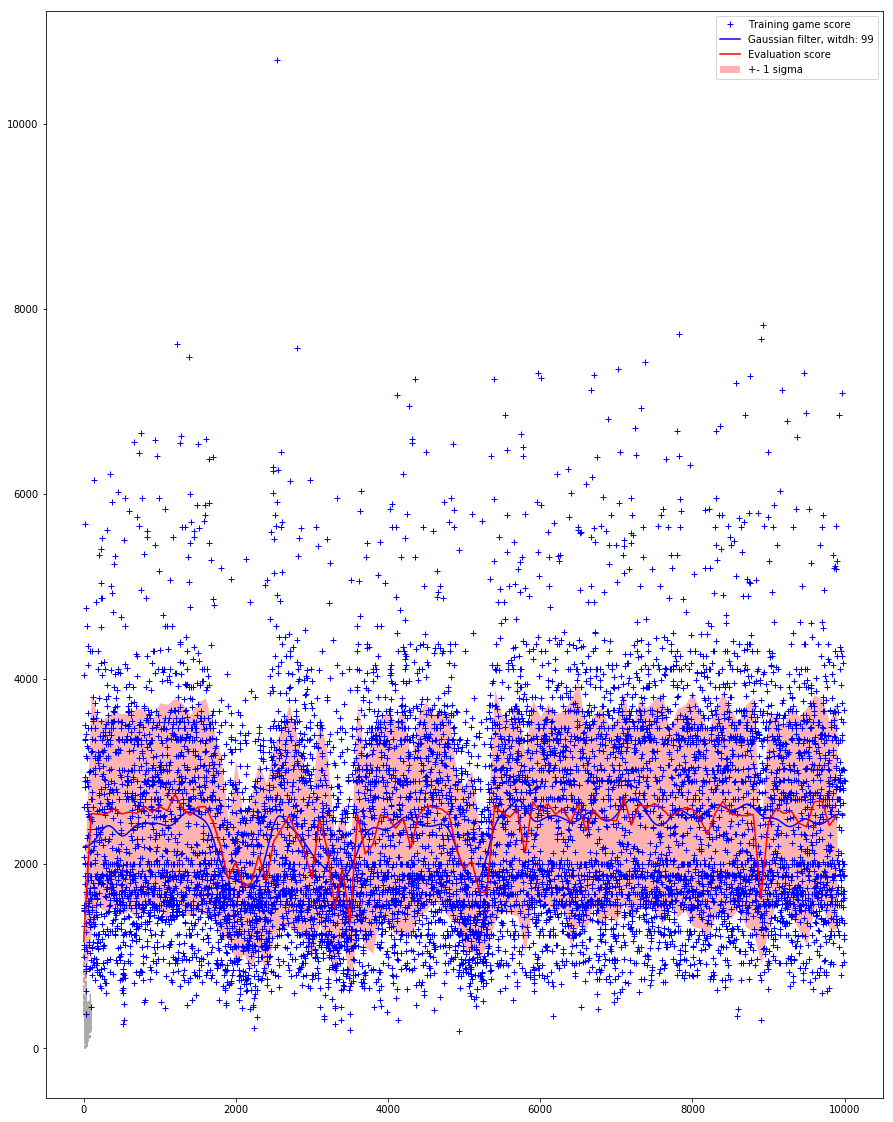

In [4]:
n_sigma = 1

err_arr = []
for l in range(100):
    t_scorearr_f = gaussian_filter(t_scorearr, l)
    err_arr.append(sum([abs(f-t) for f,t in zip(t_scorearr_f, m_scorearr)]))

filter_length = np.argmin(err_arr)

t_scorearr_f = gaussian_filter(t_scorearr, filter_length)

fig, ax = plt.subplots(1,1)

ax1 = ax
ax1.plot(t_scorearr, 'b+', label='Training game score')
ax1.plot(t_scorearr_f, 'b-', label = 'Gaussian filter, witdh: %i' % filter_length)
ax1.plot(x_arr_eval, m_scorearr, 'r', label = 'Evaluation score')
ax1.fill_between(x_arr_eval,
    [m - n_sigma*e for m,e in zip(m_scorearr, err_scorearr)], 
    [m + n_sigma*e for m,e in zip(m_scorearr, err_scorearr)], color='r',
    alpha = 0.3, linewidth = 0, label='+- %i sigma' % n_sigma)
ax1.plot([abs(a-b) for a,b in zip(t_scorearr_f, m_scorearr)], 'k--', alpha = 0.33)
ax1.legend()
plt.rcParams['figure.figsize'] = [15, 20]